## Data exploration

In [239]:
import numpy as np
import pandas as pd
from urllib import request
import matplotlib.pyplot as plt

In [240]:
np.random.seed(seed=1234)

In [241]:
url = 'https://raw.githubusercontent.com/madewithml/practicalAI/master/data/titanic.csv'
response = request.urlopen(url)
html = response.read()
with open('titanic.csv', 'wb') as f:
    f.write(html)
df = pd.read_csv('titanic.csv')
df.head(10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,1
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,1
7,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,0
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,1
9,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,0


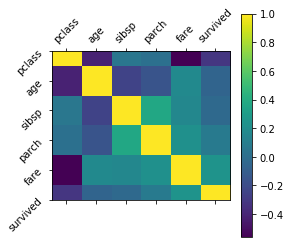

In [242]:
#Draw correlation matrix
plt.matshow(df.corr())
features = df.describe().columns
plt.xticks(range(len(features)), features, rotation='45')
plt.yticks(range(len(features)), features, rotation='45')
plt.colorbar()
plt.show()

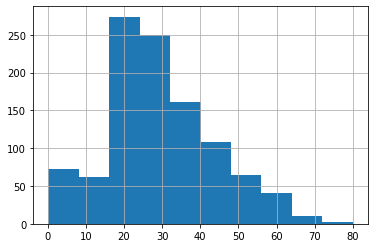

In [243]:
df['age'].hist()

In [244]:
#List all female that survived
female_survived = df[(df['sex'] == 'female') & (df['survived'] == 1)]
female_survived.count()

pclass      339
name        339
sex         339
age         292
sibsp       339
parch       339
ticket      339
fare        339
cabin       133
embarked    337
survived    339
dtype: int64

In [245]:
#Filter deceased 60 or above men
male_deceased = df[(df['sex'] == 'male') & (df['survived'] == False) & (df['age'] > 60.0)]
male_deceased.sort_values('age', ascending=False)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
727,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0
81,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,0
506,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,0
285,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,0
594,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,0
782,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,0
221,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,0


In [246]:
#Filter survived people by age. Drop irrelevant information
young = df[(df['age'] < 40.0) & (df['age'] > 16.0) & df['survived'] == 1].drop(columns=['cabin', 'sibsp', 'parch'])
old = df[(df['age'] > 40.0) & (df['survived'] == 1)].drop(columns=['cabin', 'sibsp', 'parch'])

In [247]:
olds_survived = old.count()
youngs_survived = young.count()
youngs_survived - olds_survived

pclass      167
name        167
sex         167
age         167
ticket      167
fare        167
embarked    167
survived    167
dtype: int64

In [248]:
#Find the last person in a database
df.iloc[-1, :]

pclass                       3
name        Zimmerman, Mr. Leo
sex                       male
age                         29
sibsp                        0
parch                        0
ticket                  315082
fare                     7.875
cabin                      NaN
embarked                     S
survived                     0
Name: 1308, dtype: object

## Data cleaning

In [249]:
df[pd.isnull(df).any(axis=1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [250]:
df = df.dropna()
df.reset_index()
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [251]:
df.drop(['name', 'ticket', 'cabin'], axis=1)
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0,1
1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0,1
2,1,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,0,0
3,1,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,0,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1188,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",0,24.0000,0,2,PP 9549,16.7000,G6,0,1
1189,3,"Sandstrom, Miss. Marguerite Rut",0,4.0000,1,1,PP 9549,16.7000,G6,0,1
1217,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",1,19.0000,0,0,348124,7.6500,F G73,0,0
1230,3,"Strom, Miss. Telma Matilda",0,2.0000,0,1,347054,10.4625,G6,0,0


## Feature engineering

In [252]:
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

In [253]:
df['family_size'] = df[['sibsp', 'parch']].apply(lambda x: get_family_size(x['sibsp'], x['parch']), axis=1)
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,family_size
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0,1,0
1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0,1,3
2,1,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,0,0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,0,0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",0,24.0000,0,2,PP 9549,16.7000,G6,0,1,2
1189,3,"Sandstrom, Miss. Marguerite Rut",0,4.0000,1,1,PP 9549,16.7000,G6,0,1,2
1217,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",1,19.0000,0,0,348124,7.6500,F G73,0,0,0
1230,3,"Strom, Miss. Telma Matilda",0,2.0000,0,1,347054,10.4625,G6,0,0,1


In [254]:
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'fare', 'embarked', 'survived']]
df

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0,1
1,1,1,0.9167,1,2,3,151.5500,0,1
2,1,0,2.0000,1,2,3,151.5500,0,0
3,1,1,30.0000,1,2,3,151.5500,0,0
4,1,0,25.0000,1,2,3,151.5500,0,0
...,...,...,...,...,...,...,...,...,...
1188,3,0,24.0000,0,2,2,16.7000,0,1
1189,3,0,4.0000,1,1,2,16.7000,0,1
1217,3,1,19.0000,0,0,0,7.6500,0,0
1230,3,0,2.0000,0,1,1,10.4625,0,0


In [255]:
df.to_csv('preprocessed_data', index=False)
df = pd.read_csv('preprocessed_data')
df

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0,1
1,1,1,0.9167,1,2,3,151.5500,0,1
2,1,0,2.0000,1,2,3,151.5500,0,0
3,1,1,30.0000,1,2,3,151.5500,0,0
4,1,0,25.0000,1,2,3,151.5500,0,0
...,...,...,...,...,...,...,...,...,...
265,3,0,24.0000,0,2,2,16.7000,0,1
266,3,0,4.0000,1,1,2,16.7000,0,1
267,3,1,19.0000,0,0,0,7.6500,0,0
268,3,0,2.0000,0,1,1,10.4625,0,0
